### ***Señales Electricas:*** *Trabajo Practico 6*

In [55]:
import matplotlib.pyplot as plt
import numpy as np 

from scipy.ndimage import shift 
from scipy.fft import ifft, fft
from scipy.signal import freqs, iirfilter, square

from typing import Union, List, Tuple
from IPython.display import Audio

>### Funciones auxiliares

In [56]:
def cuadrada(senial):
    y = []
    for signal in senial:
        if signal == 1:
            valor_cuad = 1
        else:
            valor_cuad = 0
        y.append(valor_cuad)
    y = np.array(y)
    return(y)

In [57]:
def FFT(y,dt):
    # Realiza la FFT de la señal y
    # array(complex) FFT(array complex y, int n, float t)
    # Entradas:
    #          y: vector de longitud N (array D)
    #          dt: intervalo de muestreo de la señal y
    # Salida:
    #          Y: resultado de FFT de y (array D)
    #          frec: frecuencia asociadoas a FFT(y)
    
    n = len (y)
    Y = np.fft.fft(y) #normalizada
    Y = Y/n
    frec = np.fft.fftfreq(n,dt)
    return Y, frec

#### *Ejercicio 1*

In [58]:
frecuencia = 5
frec_muestreo = 1000
ciclos = 10

vector_muestras_temp = np.arange(start=0,stop=ciclos * (1/frecuencia),step=(1/frec_muestreo))

senial_seno = []
for tiempo in vector_muestras_temp:
    seno = np.sin(2*np.pi*frecuencia * tiempo)
    senial_seno.append(seno)
senial_seno = np.array(senial_seno)

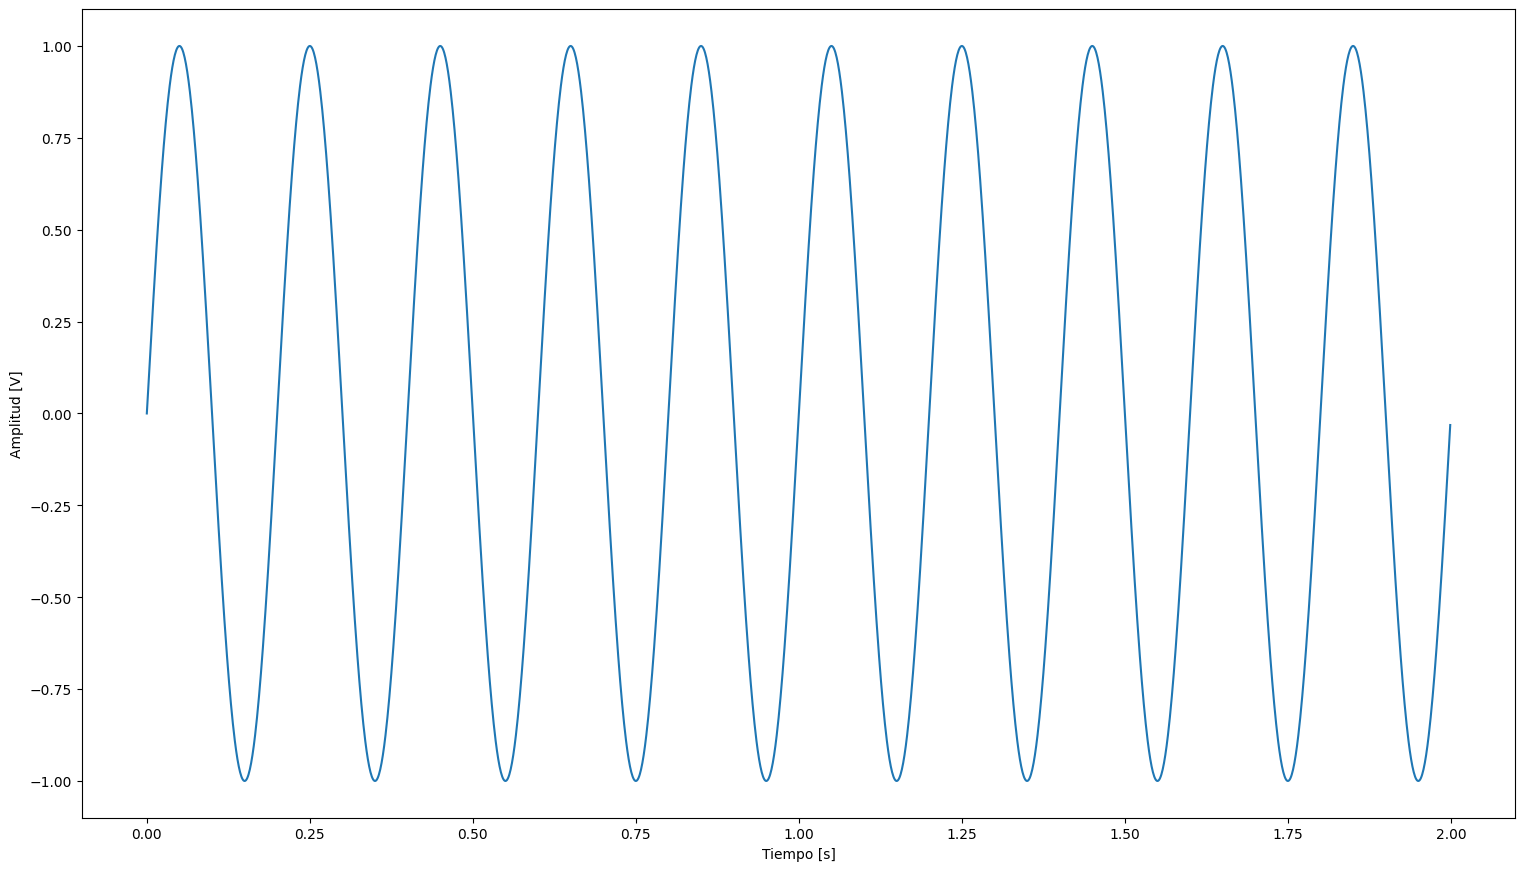

In [59]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

plt.plot(vector_muestras_temp,senial_seno)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

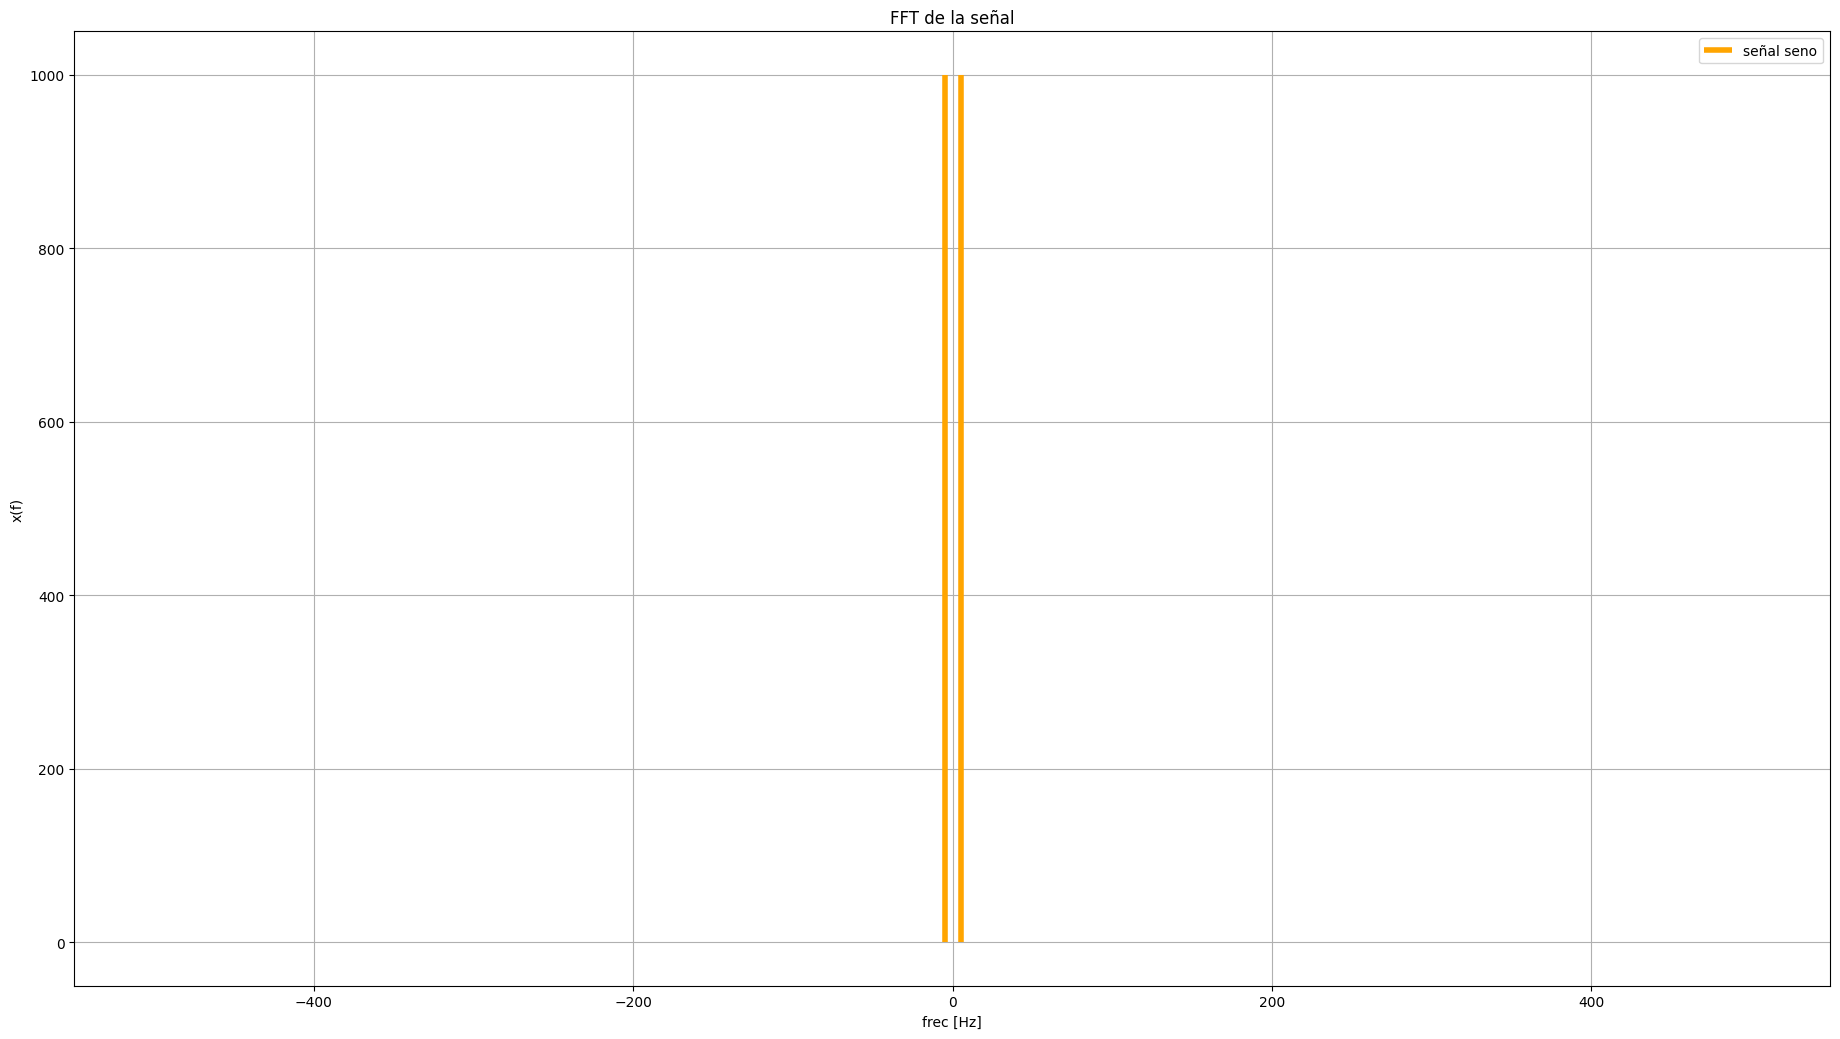

In [60]:
fft_senial = fft(senial_seno)
n1 = len(senial_seno)
freq = np.fft.fftfreq(n1,1/frec_muestreo)

fig = plt.gcf()
fig.set_size_inches(18.5,10.5)



plt.vlines(freq, 0, np.abs(fft_senial), 'orange',label = "señal seno",lw=4)
plt.legend(), plt.xlabel("frec [Hz]"), plt.ylabel("x(f)")
"plt.xlim(-50,50)"
plt.title("FFT de la señal")

plt.grid()
plt.tight_layout()
plt.show

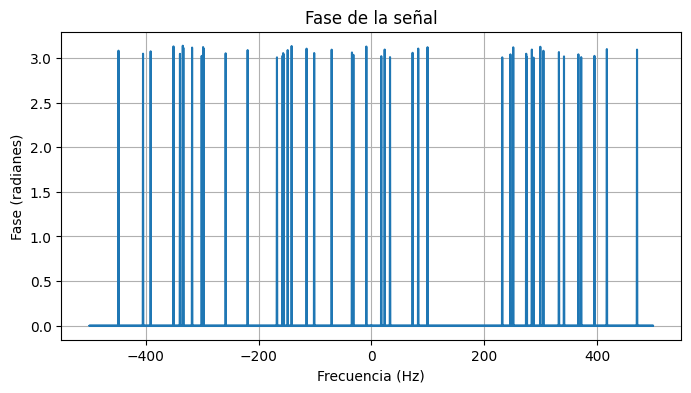

In [61]:
phase = np.angle(fft_senial)

phase [phase < 3] = 0

plt.figure(figsize=(8, 4))
plt.plot(freq, phase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.title('Fase de la señal')
plt.grid(True)
plt.show()


#### *Ejercicio 2*

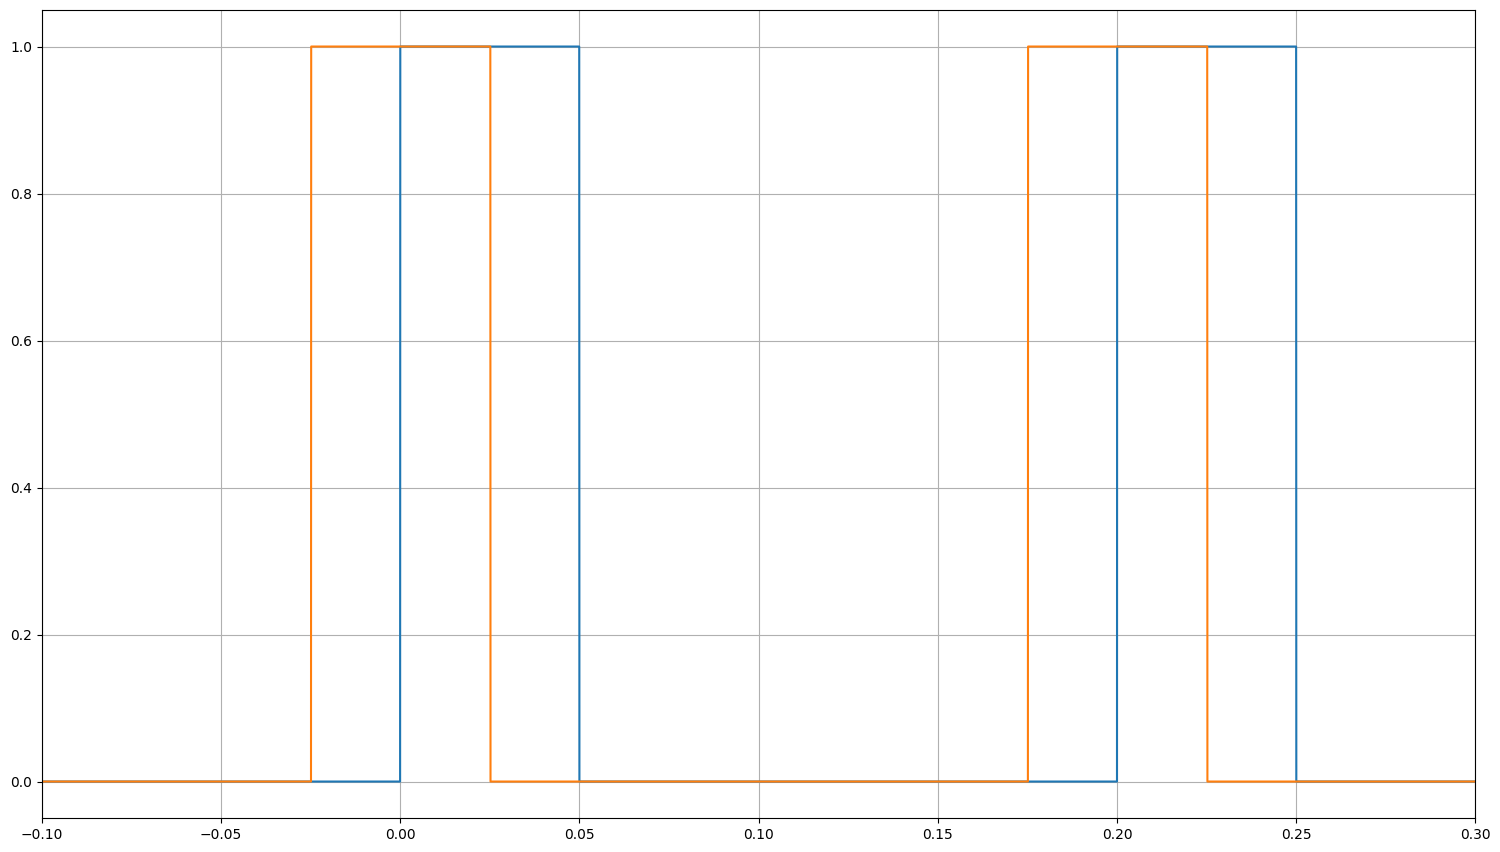

In [62]:
frec = 50 #Hz
fs = 10000
ciclos_cuad = 30
puntos_por_ciclos = 1000

vector_temp = np.linspace(start=-1,stop=ciclos_cuad*(1/frec), num=int(puntos_por_ciclos * ciclos_cuad))

senial_cuad1 = square(2 * np.pi * 5 * vector_temp,duty=0.25)
senial_cuad2 = square(2 * np.pi * 5 * vector_temp + 0.78,duty=0.25)


fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(vector_temp, cuadrada(senial_cuad1))
plt.plot(vector_temp, cuadrada(senial_cuad2))
plt.xlim(-0.1,0.3)
plt.grid()
plt.show()

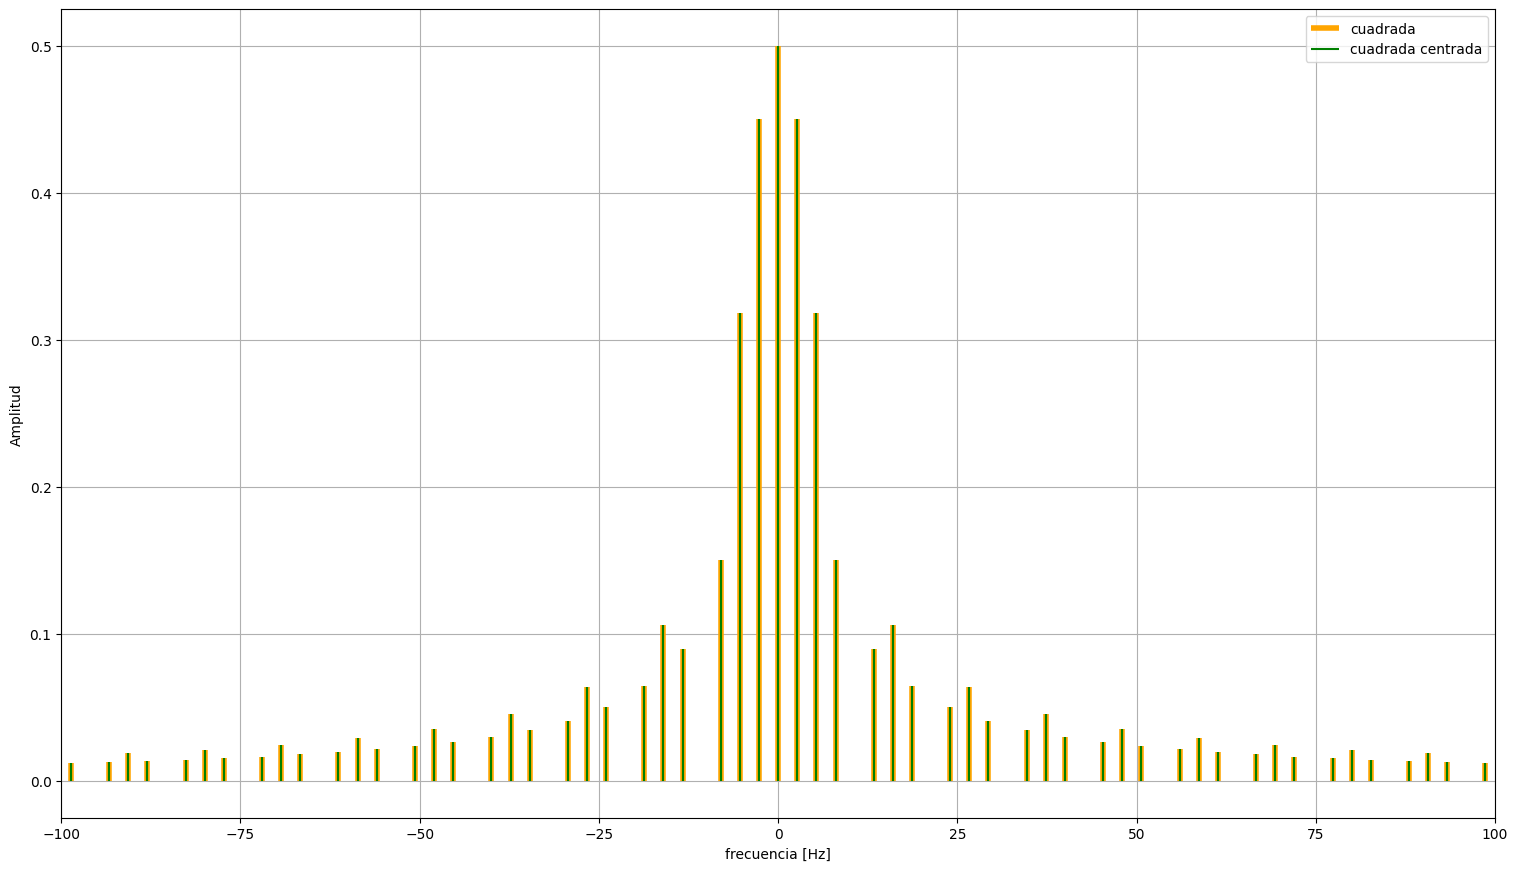

In [63]:
fft_cuad1, freq_cuad1 = FFT(senial_cuad1,1/fs)

fft_cuad2, freq_cuad2 = FFT(senial_cuad2,1/fs)

fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
#plt.plot(freq_cuad1,np.abs(fft_cuad1),"orange",label = "cuadrada 1")
plt.vlines(freq_cuad1,0,np.abs(fft_cuad1),"orange",label = "cuadrada", lw = 4)
plt.vlines(freq_cuad1,0,np.abs(fft_cuad2),"green",label = "cuadrada centrada")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("frecuencia [Hz]")
plt.xlim(-100,100)
plt.grid()
plt.show()

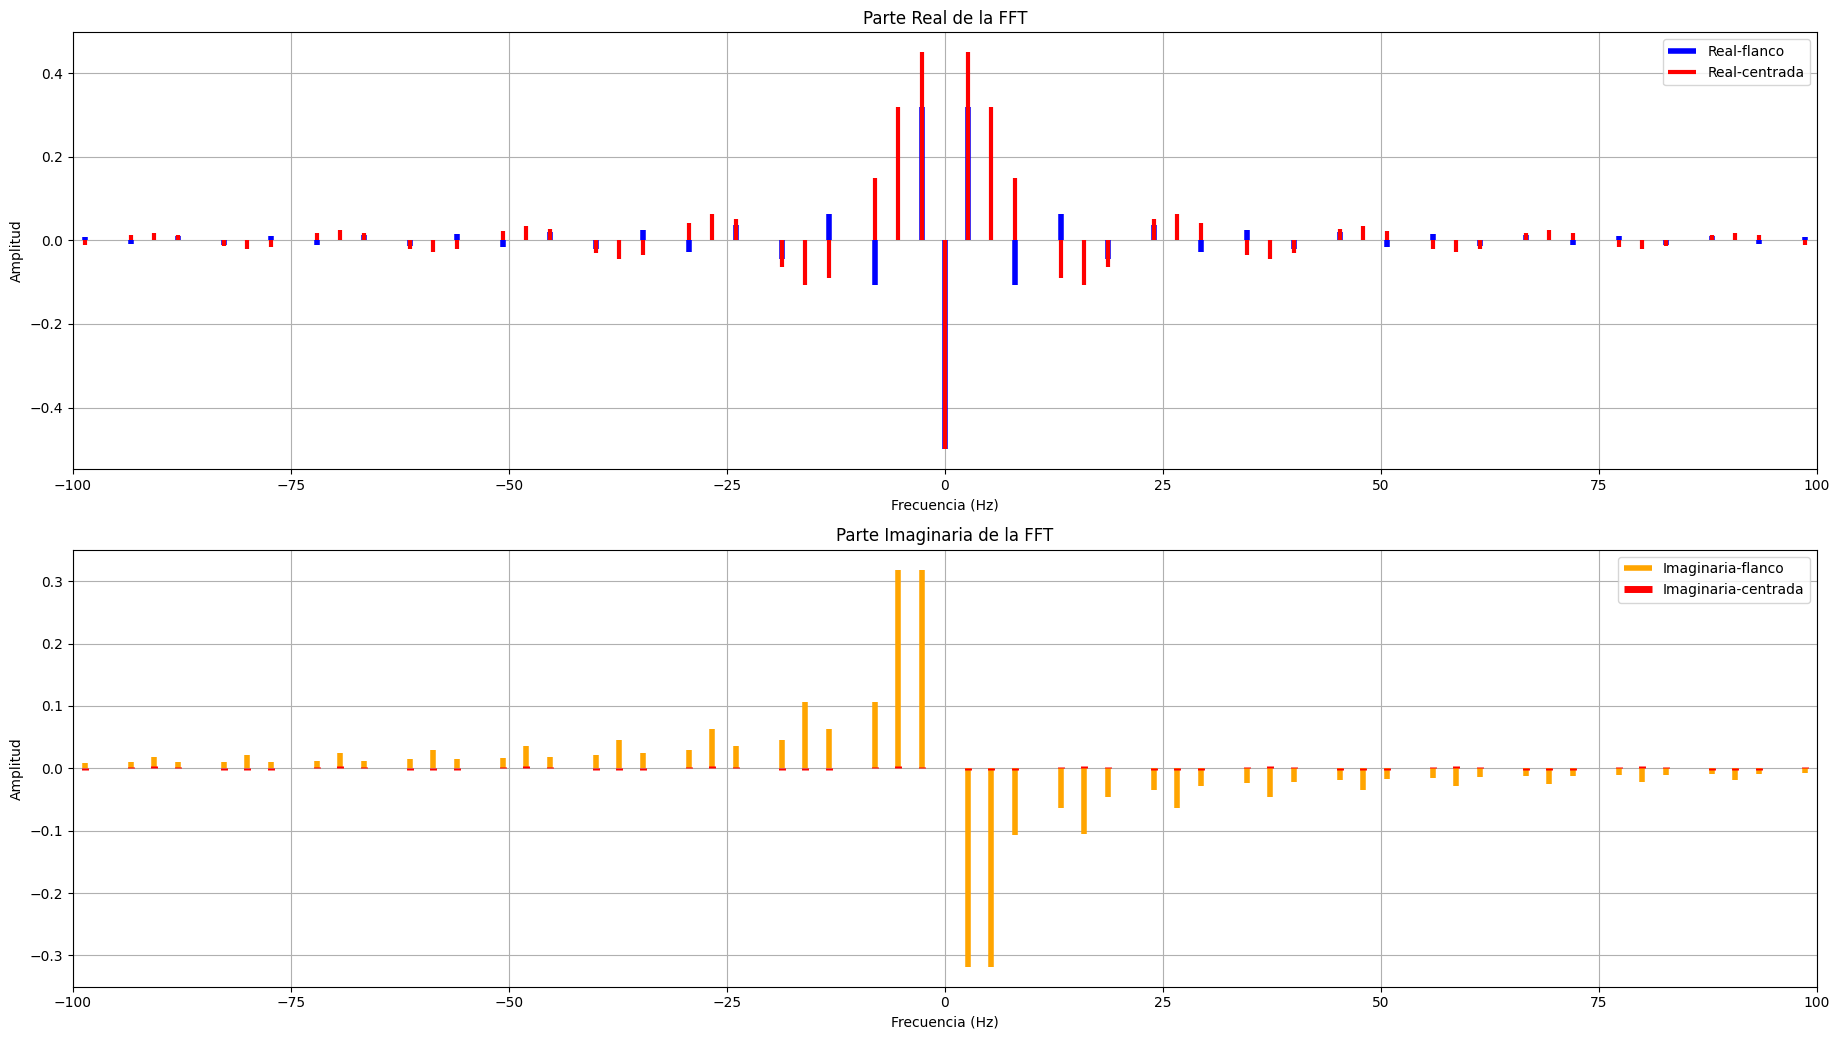

In [71]:
cuad_real1 = np.real(fft_cuad1)
cuad_imag1 = np.imag(fft_cuad1)
cuad_real2 = np.real(fft_cuad2)
cuad_imag2 = np.imag(fft_cuad2)

fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

# Parte real
plt.subplot(2, 1, 1)
plt.vlines(freq_cuad1, 0, cuad_real1, label='Real-flanco', color="blue", lw=4)
plt.vlines(freq_cuad2, 0, cuad_real2, label='Real-centrada', color="red", lw=3)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Parte Real de la FFT')
plt.grid(True)
plt.legend()
plt.xlim(-100,100)

# Parte imaginaria
plt.subplot(2, 1, 2)
plt.vlines(freq_cuad1, 0, cuad_imag1, label='Imaginaria-flanco', color='orange', lw=4)
plt.vlines(freq_cuad2, 0, cuad_imag2, label='Imaginaria-centrada', color='red', lw=5)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Parte Imaginaria de la FFT')
plt.grid(True)
plt.legend()
plt.xlim(-100,100)

plt.tight_layout()
plt.show()

#### *Ejercicio 3*